# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

In [0]:
!wget https://nlp100.github.io/data/neko.txt

In [0]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

In [0]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [4]:
!wc -l ./neko.txt.mecab

216302 ./neko.txt.mecab


In [5]:
!head -10 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。


## 30. 形態素解析結果の読み込み
***
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [6]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f:
  for line in f:  # 1行ずつ読込
    if line != 'EOS\n':  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加 
      surface, attr = line.split('\t')
      attr = attr.split(',')
      morph = {'surface': surface, 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
      morphs.append(morph)
    else:  # 文末：形態素リストを文リストに追加
      sentences.append(morphs)
      morphs = []

# 確認
for morph in sentences[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 31. 動詞
***
動詞の表層形をすべて抽出せよ．

In [7]:
ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['surface'])  # set型なので重複しない要素のみ保持していく

# 確認
print(f'動詞の表層形の種類: {len(ans)}\n')
print('---サンプル---')
for i in range(10):
  print(list(ans)[i])

動詞の表層形の種類: 3893

---サンプル---
儲け
忍ん
並べる
気がつい
候え
やい
隔て
保っ
まつわっ
から


## 32. 動詞の原形
***
動詞の原形をすべて抽出せよ．

In [8]:
ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['base'])

# 確認
print(f'動詞の原形の種類: {len(ans)}\n')
print('---サンプル---')
for i in range(10):
  print(list(ans)[i])

動詞の原形の種類: 2300

---サンプル---
並べる
待ち受ける
拗じる
打てる
応ずる
引き受ける
畳み込む
刺し通す
生える
言い付ける


## 33. 「AのB」
***
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [9]:
ans = set()
for sentence in sentences:
  for i in range(1, len(sentence) - 1):
    if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':
      ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

# 確認
print(f'「名詞+の+名詞」の種類: {len(ans)}\n')
print('---サンプル---')
for i in range(10):
  print(list(ans)[i])

「名詞+の+名詞」の種類: 4924

---サンプル---
辟易の体
介の半面
自分の嫌い
警察の厄介
法のうち
事物の適
世人の探偵
護の恐れ
二つの要素
立てのフロック


## 34. 名詞の連接
***
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [10]:
ans = set()
for sentence in sentences:
  nouns = ''
  num = 0
  for i in range(len(sentence)):
    if sentence[i]['pos'] == '名詞':  # 最初の形態素から順に、名詞であればnounsに連結し、連結数(num)をカウント
      nouns = ''.join([nouns, sentence[i]['surface']])
      num += 1
    elif num >= 2:  # 名詞以外、かつここまでの連結数が2以上の場合は出力し、nounsとnumを初期化
      ans.add(nouns)
      nouns = ''
      num = 0
    else:  # それ以外の場合、nounsとnumを初期化
      nouns = ''
      num = 0

# 確認
print(f'連接名詞の種類: {len(ans)}\n')
print('---サンプル---')
for i in range(10):
  print(list(ans)[i])

連接名詞の種類: 4454

---サンプル---
かん猪口
通り今日
必竟世間
二枚かけ
君シャンパン
近付
ばかよう
木槿垣
今十年
刺激以外


## 35. 単語の出現頻度
***
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [11]:
from collections import defaultdict 

ans = defaultdict(int)
for sentence in sentences:
  for i in range(len(sentence)):
    if sentence[i]['pos'] != '記号':
      ans[sentence[i]['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

# 確認
for i in range(5):
  print(ans[i])

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)


## 36. 頻度上位10語
***
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [0]:
!pip install japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


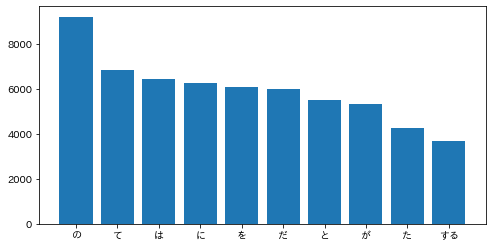

In [13]:
import matplotlib.pyplot as plt
import japanize_matplotlib

ans = defaultdict(int)
for sentence in sentences:
  for i in range(len(sentence)):
    if sentence[i]['pos'] != '記号':
      ans[sentence[i]['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
***
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

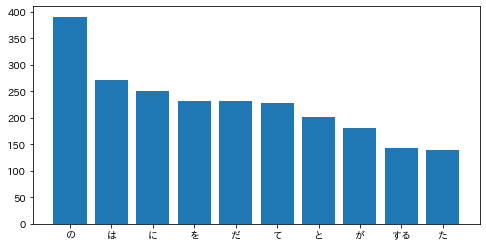

In [14]:
ans = defaultdict(int)
for sentence in sentences:
  if '猫' in [morph['surface'] for morph in sentence]:  # 文章の形態素に「猫」が含まれる場合のみ辞書に追加
    for i in range(len(sentence)):
      if sentence[i]['pos'] != '記号':
        ans[sentence[i]['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
del ans['猫']
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

## 38. ヒストグラム
***
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

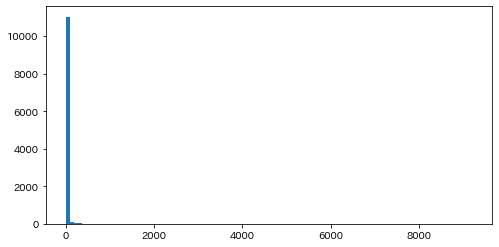

In [15]:
ans = defaultdict(int)
for sentence in sentences:
  for i in range(len(sentence)):
    if sentence[i]['pos'] != '記号':
      ans[sentence[i]['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = ans.values()

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.show()

## 39. Zipfの法則
***
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

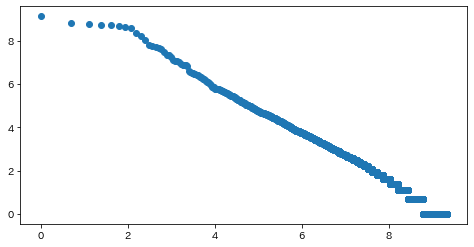

In [16]:
import math

ans = defaultdict(int)
for sentence in sentences:
  for i in range(len(sentence)):
    if sentence[i]['pos'] != '記号':
      ans[sentence[i]['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [math.log(r + 1) for r in range(len(ans))]
values = [math.log(a[1]) for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.show()